<a href="https://colab.research.google.com/github/trjgdyan/PCVK_Genap_2021/blob/main/Week5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Nama : Tri Jagad Ariyani**
# **Kelas : 3CTI**
# **NIM : 2141720049**
# **Mata Kuliah : PCVK_Week 5**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [202]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import glob
from math import log10, sqrt
from PIL import Image

# **TUGAS PRAKTIKUM**

1. Buat Gamma Correction sesuai dengan petunjuk berikut

Percobaan ini akan meminta anda membuat Gamma Correction. Pada percobaan ini, nilai
Gamma akan diset dengan meminta masukan dari pengguna. Berikut adalah kode untuk
meminta masukan nilai dari pengguna. Lanjutkan kode tersebut dengan membuat image
dengan gamma correction sesuai rumus yang telah diberikan.

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


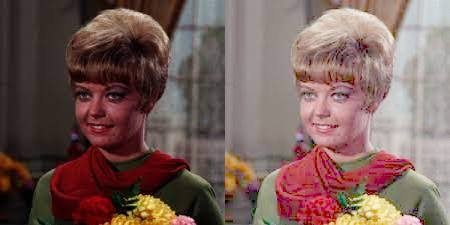

In [3]:
print(' Gamma Correction pada citra ')
print('----------------------------------')
try:
 gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
 print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK/images/cewek.jpeg')
gamma_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      gamma_image[y,x,c] = np.clip(255 * pow  (original[y,x,c] / 255, (1 / gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buat Simulasi Image Depth

Percobaan ini digunakan sebagai simulasi dari proses kuantisasi citra. Pada kuantisasi citra,
pixel dapat direpresentasikan dengan n-bit kedalaman (default menggunakan 8-bit). Pada
pixel 8-bit, warna yang memungkinkan adalah 256 warna, dari 0 (0000 0000) hingga
255(1111 1111). Pada pixel 7-bit, warna yang memungkinkan adalah 128 warna, dari 0 (000
0000) hingga 127 (111 1111). Kemungkinan warna didapat dari pangkat 2 jumlah bit. Jika
7bit, maka jumlah warnanya adalah 27
 = 128, dst.
Berikut adalah kode untuk membaca citra masukan dan memberi nilai kedalaman citra,
silahkan lanjutkan kode program berikut sehingga menghasilkan keluaran seperti contoh
pada Gambar

Masukan Nilai Bit Depth : 1


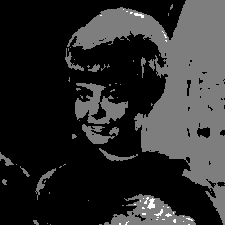

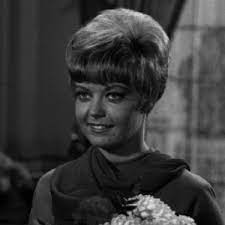

In [114]:
original = cv.imread('/content/drive/MyDrive/PCVK/images/cewek.jpeg', cv.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

try :
  bit = int(input('Masukan Nilai Bit Depth : '))
except ValueError :
  print('Number Error')

level = 255/(2**bit)-1

for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    depth_image[y,x] = np.clip(round(original[y,x]/level) * level, 0, 255)

final_frame = cv.hconcat((original, depth_image))
cv2_imshow(depth_image)
cv2_imshow(original)

3. Buat modul average denoising

Buat modul average denoising sesuai dengan rumus yang telah diberikan pada sub bab
sebelumnya.
Citra asli sudah disediakan pada /images/galaxy.jpg.
100 Citra dengan Gaussian Noise sudah disediakan pada /images/noises/*.jpg
Anda dapat menggunakan code berikut untuk membaca semua image dalam satu folder ,
gunakan modul glob (import glob).


In [122]:
cv_img = []
for img in glob.glob('./drive/MyDrive/PCVK/Images/noises/*.jpg'):
  n= cv.imread(img)
  cv_img.append(n)

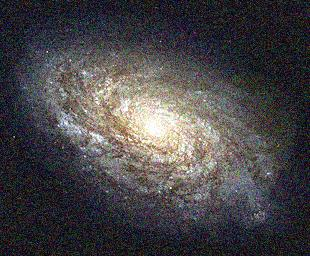

In [123]:
dst = cv.fastNlMeansDenoisingColoredMulti(cv_img, 99, 1)
cv2_imshow(n)

In [124]:
import math

def PSNR(img,amount):
  first_image = img[0]
  for x in range(1,amount):
    if(x==0):
      continue
    first_image = first_image - img[x]
    #print(x)
  mse = np.mean((first_image) ** amount)
  if(mse == 0):
    return 100
  max_pixel = 255.0
  psnr = 20 * math.log10(max_pixel / math.sqrt(mse))
  return psnr

print('PSNR')
print('------------------------------')
try:
  averageCitra = int(input('Masukan jumlah citra average: '))
except ValueError:
  print('Error, not a number')
result = PSNR(cv_img,averageCitra)
print('Nilai PSNR: ')
print(result)

PSNR
------------------------------
Masukan jumlah citra average: 5
Nilai PSNR: 
28.357776861217584


In [135]:
original = cv.imread('./drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('./drive/MyDrive/PCVK/Images/noises/*.jpg'):
    n = cv.imread(img)
    cv_img.append(n)

dst = cv_img[0]
noise_number = 4 # nomor (array) gambar pada folder noises
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

Nilai PSNR adalah 27.533477606320623 (dB)


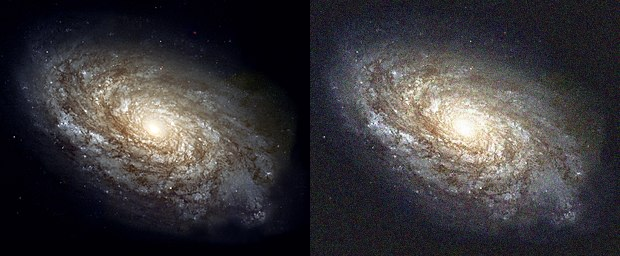

In [136]:
def PSNR(original, compressed):
    mse = np.mean((original - compressed) ** 2)
    if(mse == 0):  # MSE is zero means no noise is present in the signal.
                  # Therefore PSNR have no importance.
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR(dB) adalah =  27.539097668424894


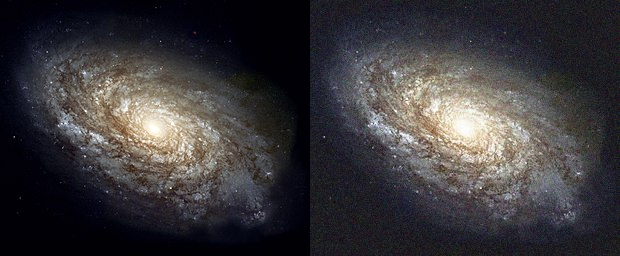

In [140]:
# Jumlah Citra di Average 5
dst = cv_img[0]
noise_number = 5
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR(dB) adalah = ',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR(dB) adalah =  27.56486991417544


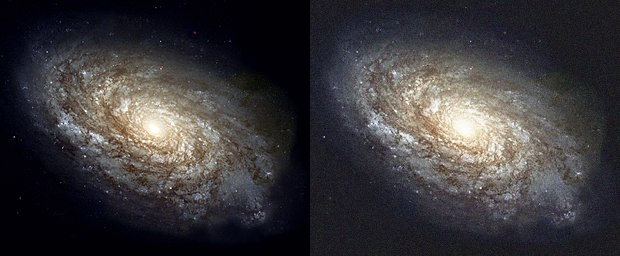

In [141]:
# Jumlah Citra di Average 10
dst = cv_img[0]
noise_number = 10
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR(dB) adalah = ',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah(dB) =  27.542870300754313


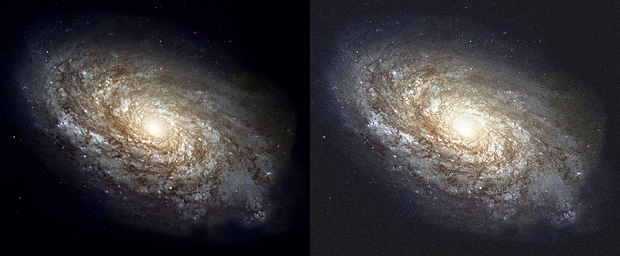

In [145]:
# Jumlah Citra di Average 20
dst = cv_img[0]
noise_number = 20
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah(dB) = ',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah(dB) =  27.50323340555272


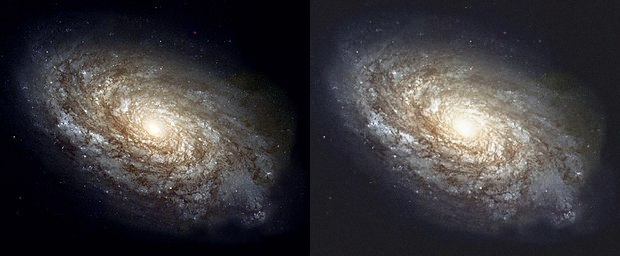

In [146]:
# Jumlah Citra di Average 40
dst = cv_img[0]
noise_number = 40
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah(dB) = ',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah(dB) =  27.514551440927526


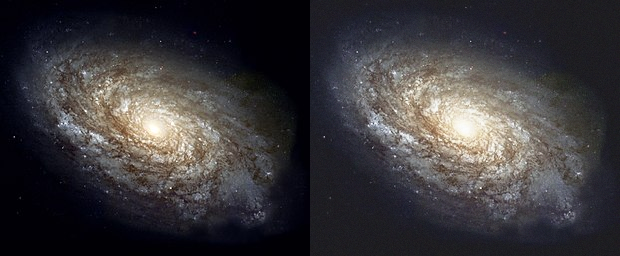

In [147]:
# Jumlah Citra di Average 80
dst = cv_img[0]
noise_number = 80
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah(dB) = ',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

Nilai PSNR adalah 27.520998053025124 (dB)


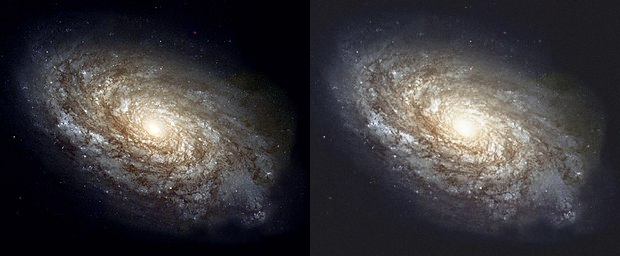

In [134]:
# Jumlah Citra di Average 100
dst = cv_img[0]
noise_number = 100
for i in range(noise_number):
    if i == 0:
        pass
    else:
        alpha = 1.0 / (i + 1)
        beta = 1.0 - alpha
        dst = cv.addWeighted(cv_img[i], alpha, dst, beta, 0.0)

compressed = dst
psnr = PSNR(original, compressed)

print('Nilai PSNR adalah(dB) = ',psnr)
galaxy_frame = cv.hconcat((original, dst))
cv2_imshow(galaxy_frame)

4. Buatkan image masking untuk image berikut. Image kiri adalah image asli (images/couple.tiff), sedangkan image paling kanan adalah hasilnya

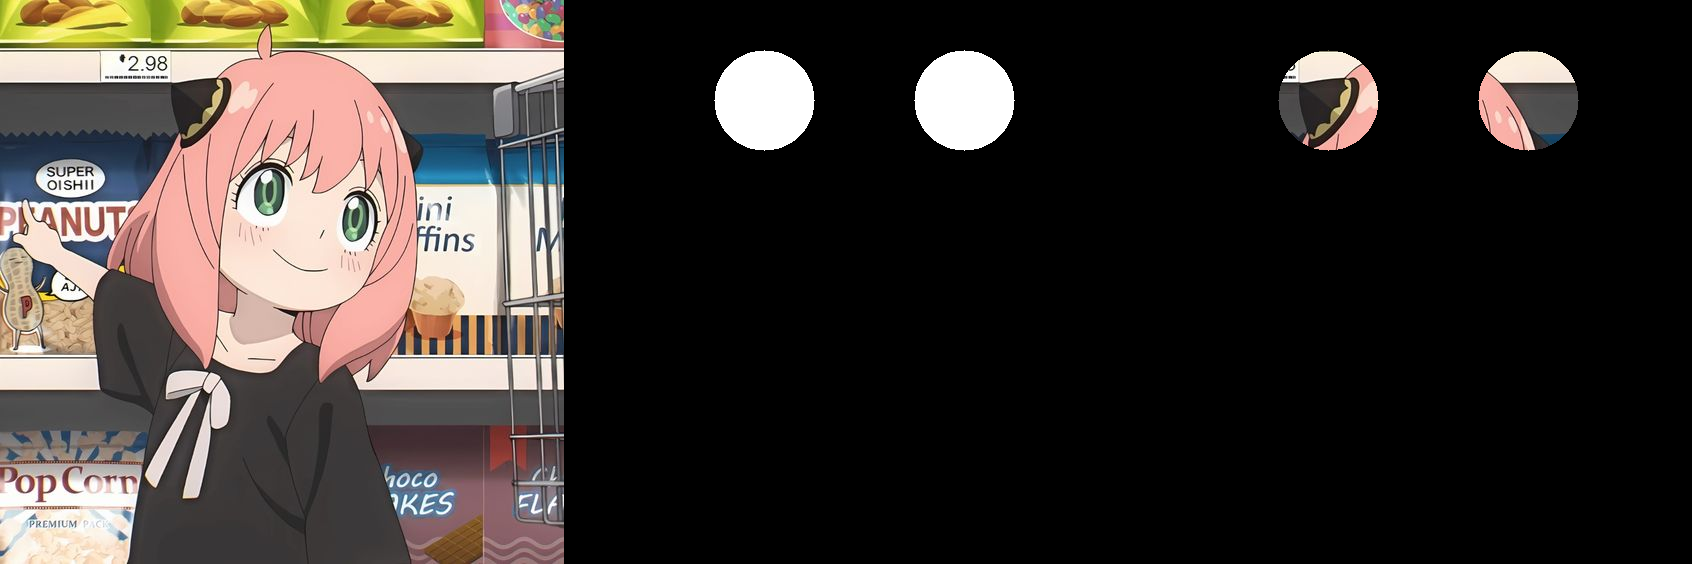

In [6]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/anyaa.jpg')

mask = np.zeros(image.shape[:2], dtype=np.uint8)

center1 = (200, 100)
radius1 = 50

cv.circle(mask, center1, radius1, 255, -1)

center2 = (400, 100)
radius2 = 50

cv.circle(mask, center2, radius2, 255, -1)

masked_image = cv.bitwise_and(image, image, mask=mask)
mask_color = cv.cvtColor(mask, cv.COLOR_GRAY2BGR)

combined_image = cv.hconcat([image, mask_color, masked_image])
cv2_imshow(combined_image)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.
Tunjukkan hasil analisa anda kenapa citra keluarannya seperti itu

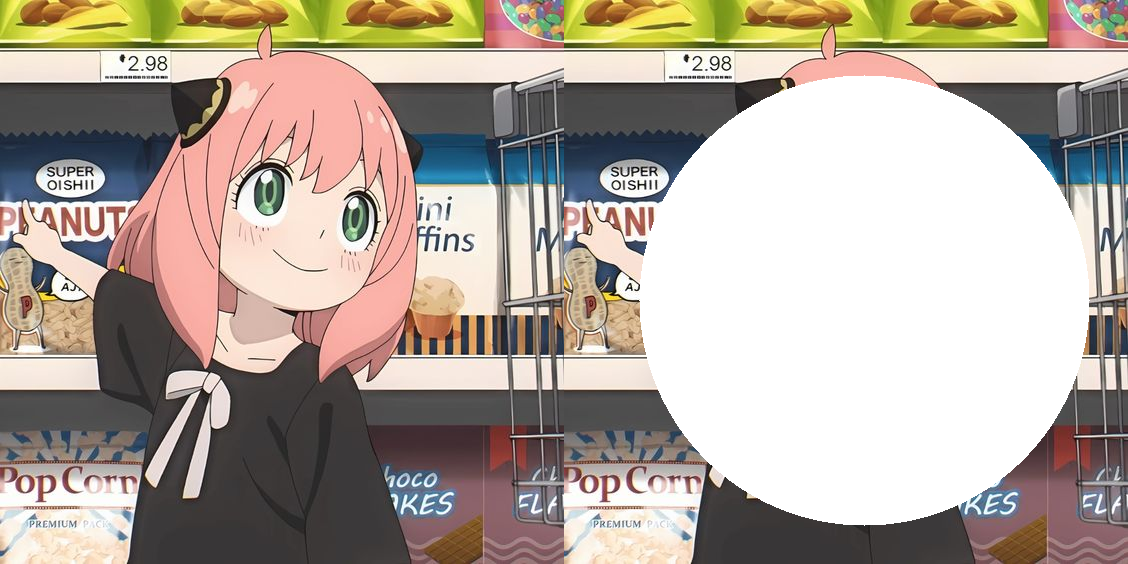

In [ ]:
# Operator OR

img_org = cv.imread('/content/drive/MyDrive/PCVK/images/anyaa.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = img_org | mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

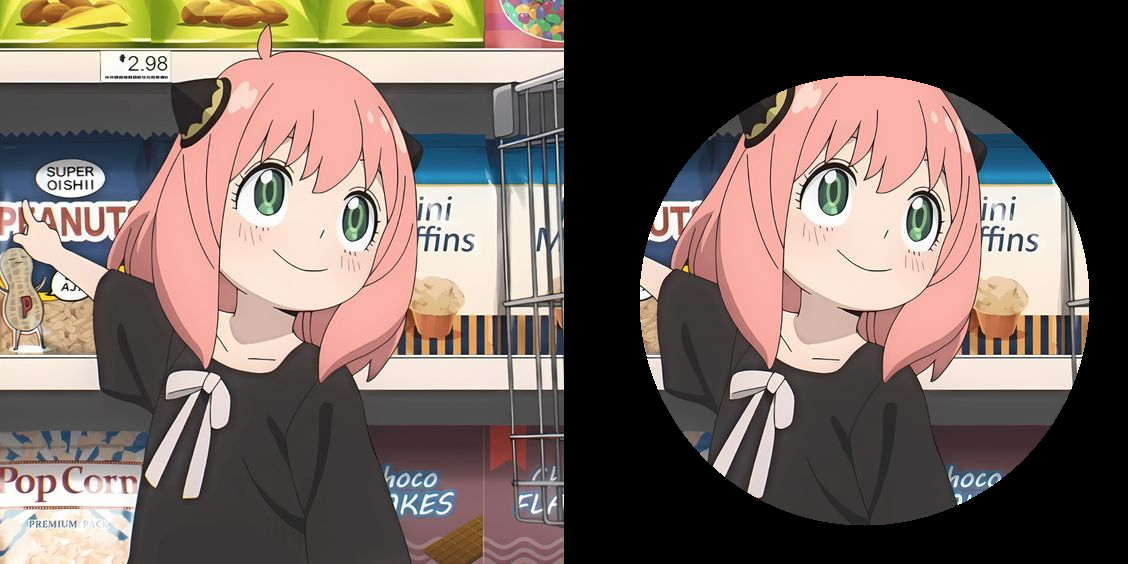

In [ ]:
# Operator AND

img_org = cv.imread('/content/drive/MyDrive/PCVK/images/anyaa.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = img_org & mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

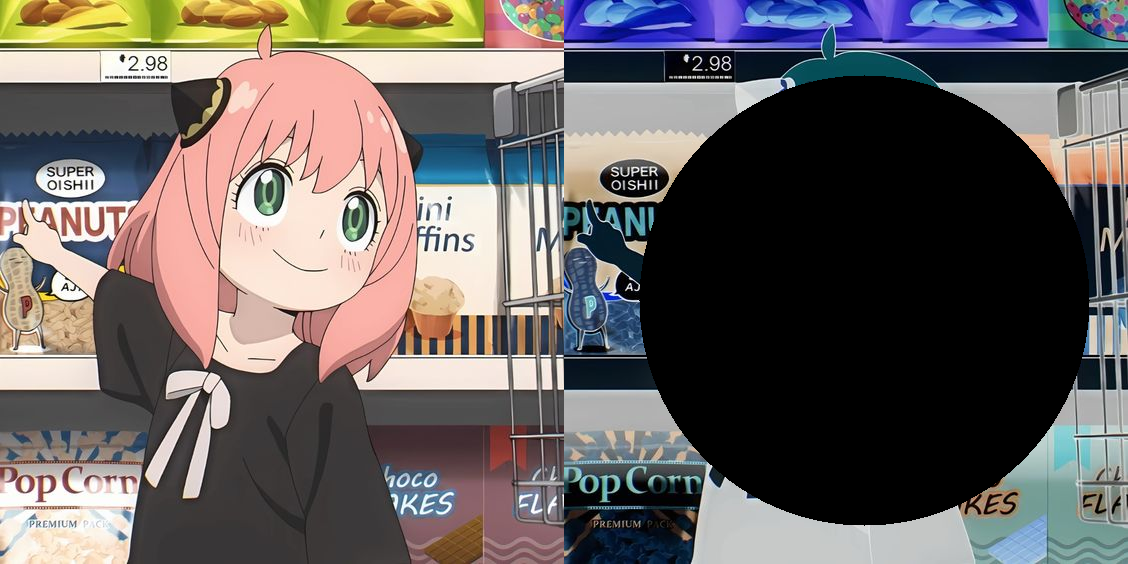

In [ ]:
# Operator NOT

img_org = cv.imread('/content/drive/MyDrive/PCVK/images/anyaa.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300,300), 225, (255,255,255), -1)

result = ~img_org & ~mask

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

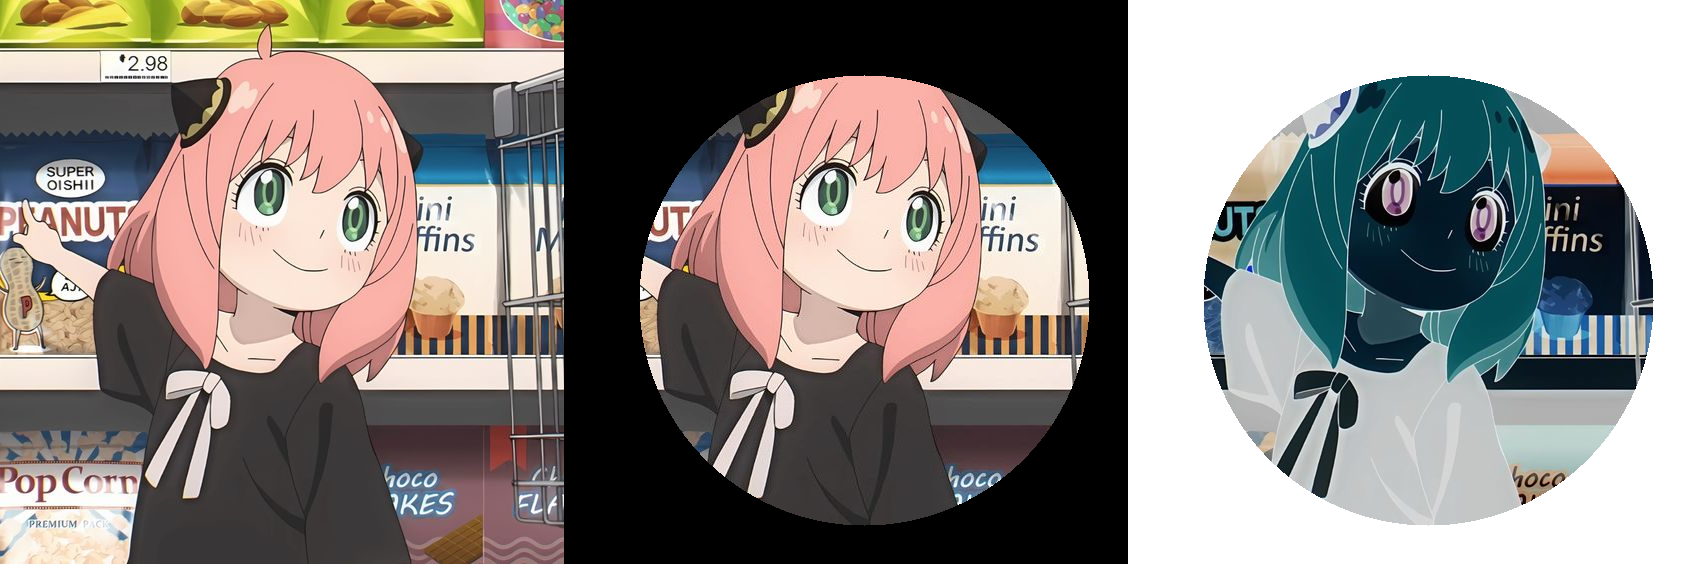

In [ ]:
# Operator NAND
img_org = cv.imread('/content/drive/MyDrive/PCVK/images/anyaa.jpg')


mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300, 300), 225, (255, 255, 255), -1)

result_and = cv.bitwise_and(img_org, mask)

result_nand = cv.bitwise_not(result_and)

org_and_nand_frame = cv.hconcat((img_org, result_and, result_nand))

cv2_imshow(org_and_nand_frame)

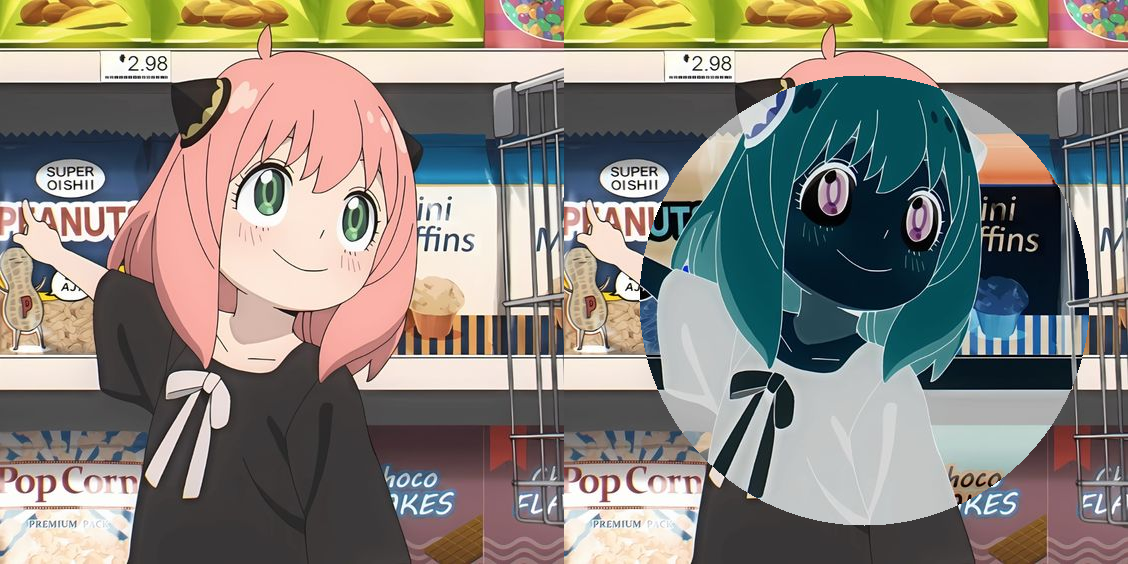

In [ ]:
# Operator XOR
img_org = cv.imread('/content/drive/MyDrive/PCVK/images/anyaa.jpg')

mask = np.zeros(img_org.shape, dtype=np.uint8)
mask = cv.circle(mask, (300, 300), 225, (255, 255, 255), -1)

result = cv.bitwise_xor(img_org, mask)

org_frame = cv.hconcat((img_org, result))
cv2_imshow(org_frame)

# **Tugas Kelompok**

Gunakan Image masking untuk mengambil bagian tertentu dari kartu identitas menggunakan fungsi yang telah Anda pelajari. Kemudian masing-masing simpan dalam nama image baru

Kelompok 2 : ambil bagian TTL dan Jenis Kelamin

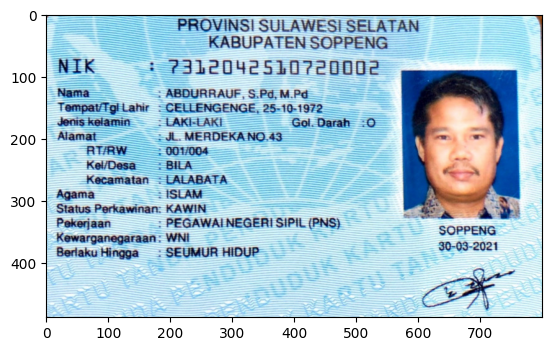

In [27]:
image = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.imshow(image)

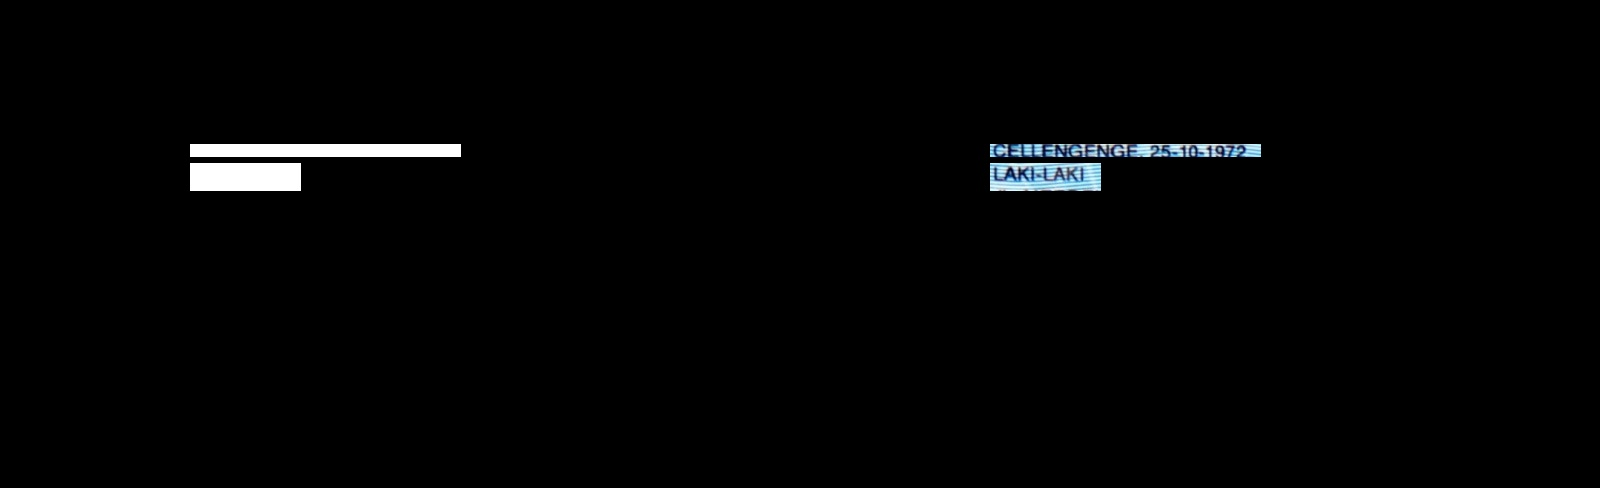

In [196]:
from google.colab import drive
from IPython.display import Image
import cv2

image = cv2.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')

# membuat mask
mask = np.zeros(image.shape[:2], dtype=np.uint8)

# membuat rectangle untuk menandai mana yang akan diberi mask
# mask TTL
x1, y1, x2, y2 = 460, 156, 190, 144
cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)

# mask Jenis Kelamin
x1, y1, x2, y2 = 300, 190, 190, 163
cv2.rectangle(mask, (x1, y1), (x2, y2), 255, -1)

masked_image = cv2.bitwise_and(image, image, mask=mask)
mask_color = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
combined_image = cv2.hconcat([mask_color, masked_image])

# menyimpan gambar di drive
output_path = '/content/drive/MyDrive/PCVK/images/hasilMask_ktp.jpeg'
cv2.imwrite(output_path, combined_image)

Image(output_path)

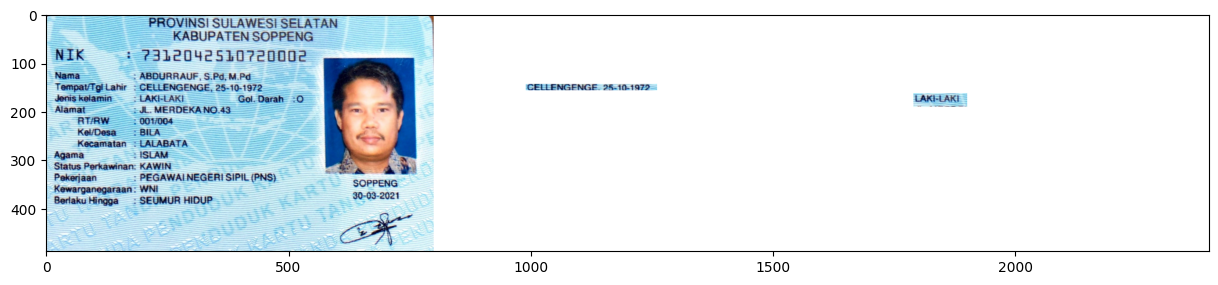

In [204]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/images/ktp1.jpeg')
img_ktp1 = cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB)

image_masking1 = np.zeros(img_ktp1.shape, dtype=np.uint8)
#mask TTL
masking1 = cv.rectangle(image_masking1, pt1=(460,156), pt2=(190,144), color=(255,255,255), thickness=cv.FILLED)

#mask jenis kelamin
image_masking2 = np.zeros(img_ktp1.shape, dtype=np.uint8)
masking2 = cv.rectangle(image_masking2, pt1=(300,190), pt2=(190,163), color=(255,255,255), thickness=cv.FILLED)


original = ~ img_ktp1

ttl = ~ (image_masking1 & original)
cv.imwrite('/content/drive/MyDrive/PCVK/images/ttl.jpeg', cv.cvtColor(ttl, cv.COLOR_RGB2BGR))
jeniskelamin = ~ (image_masking2 & original)
cv.imwrite('/content/drive/MyDrive/PCVK/images/jeniskelamin.jpg', cv.cvtColor(jeniskelamin, cv.COLOR_RGB2BGR))

final_frame = cv.hconcat((img_ktp1, ttl, jeniskelamin))
plt.figure(figsize=(15, 5))
plt.imshow(final_frame)
plt.show()

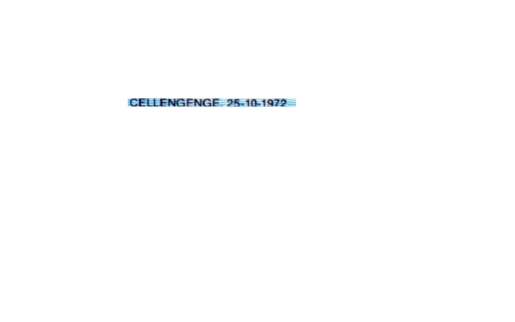

In [201]:
image_path = '/content/drive/MyDrive/PCVK/images/ttl.jpeg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()


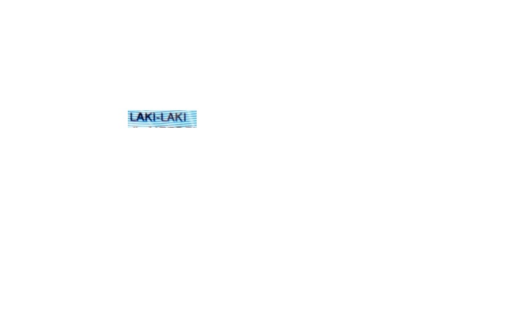

In [206]:
image_path = '/content/drive/MyDrive/PCVK/images/jeniskelamin.jpg'
img = Image.open(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

mask dan hasil maskk telah berhasil disimpan pada google drive

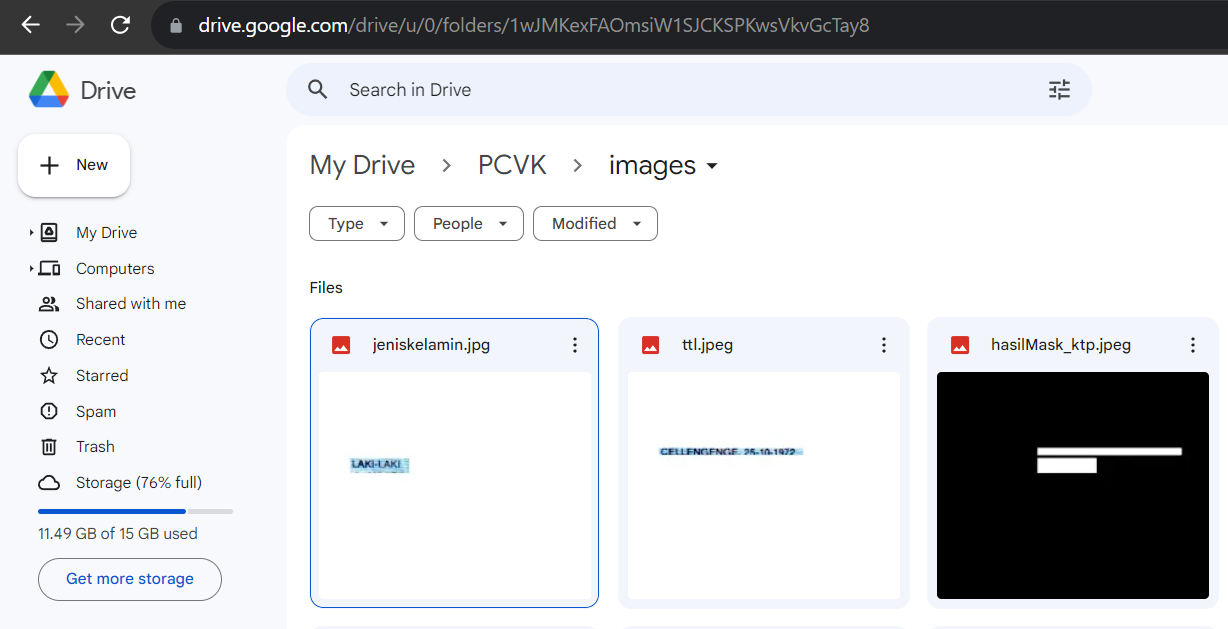

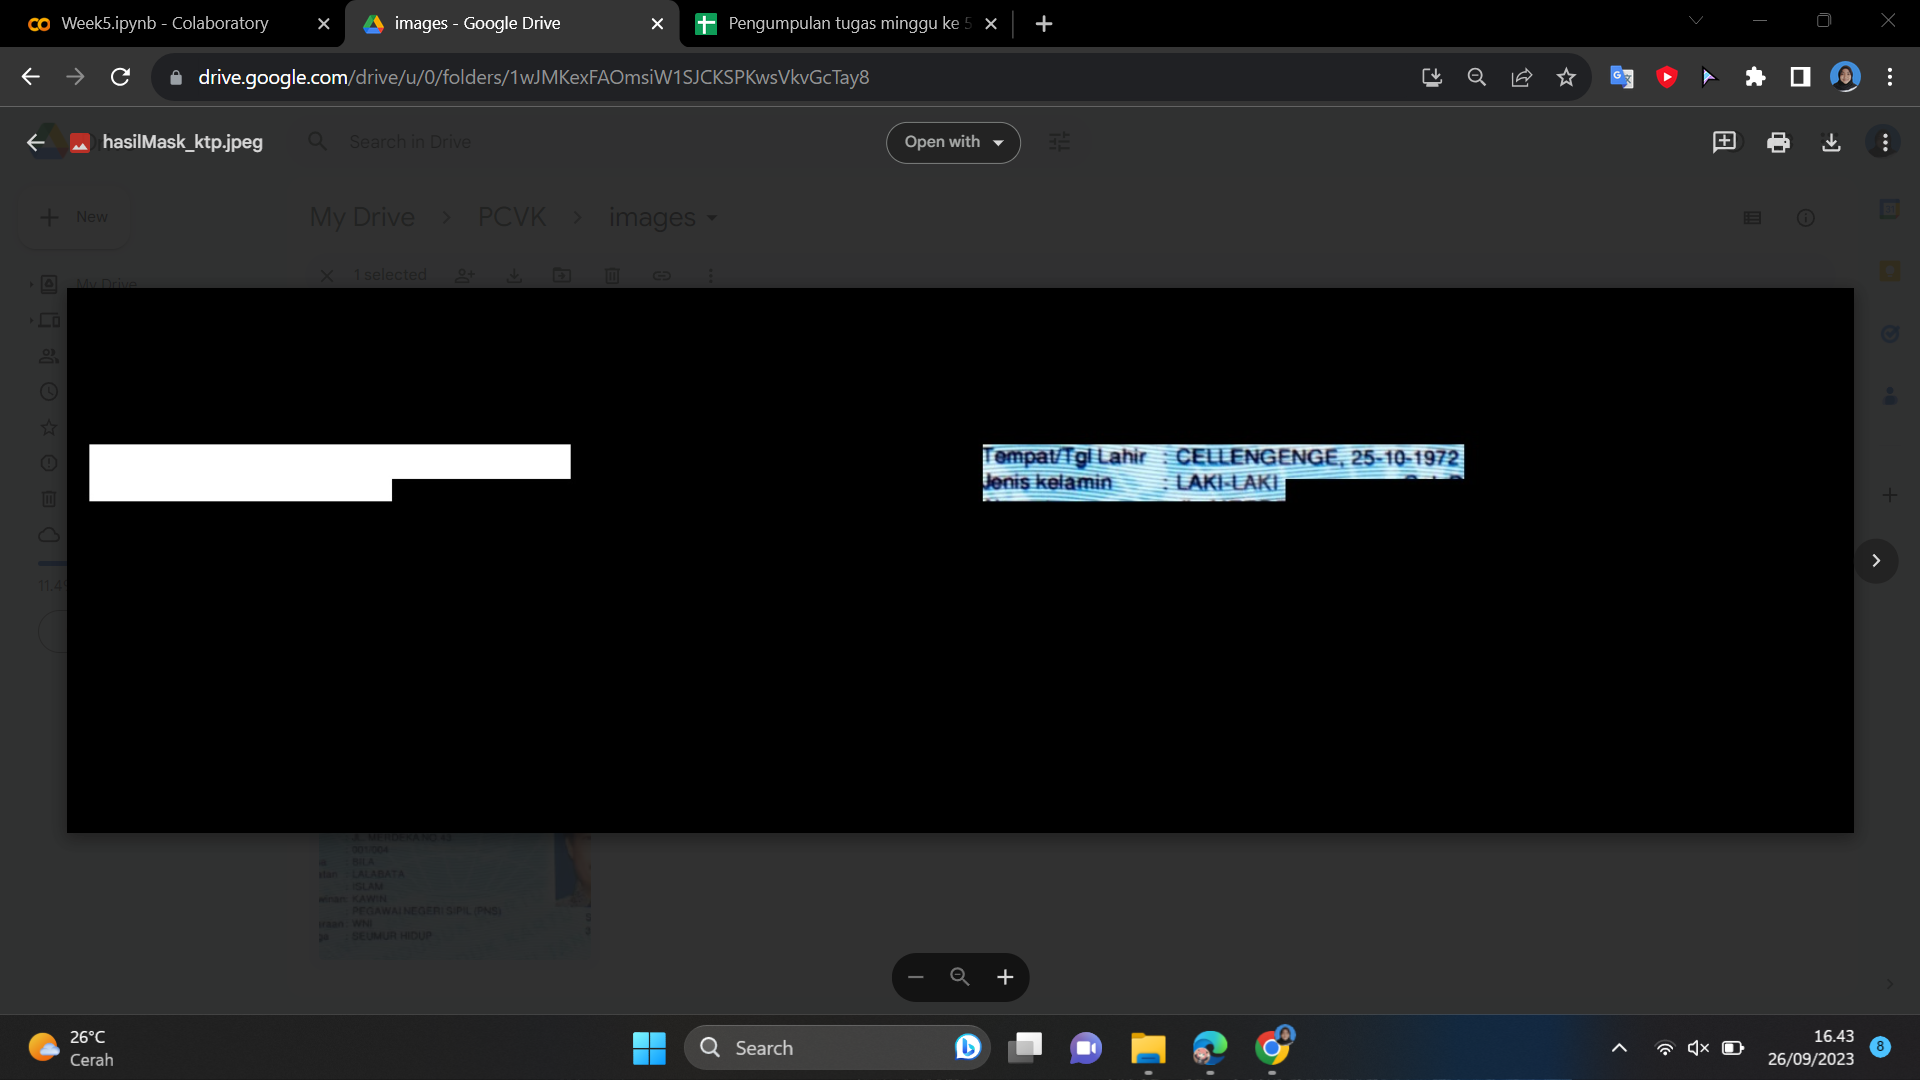